In [10]:
import matplotlib.pyplot as plt
import bilby
import numpy as np

import hphc

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22
%matplotlib inline

# Searching for chirp_mass and lso_f prior range with respect to mass_1 and mass_2

In [2]:
mass_1 = 15
mass_2 = 10
chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
tot_m = chirp_mass*(1+mass_ratio)**(6/5)/mass_ratio**(3/5)
print(chirp_mass,mass_ratio)
print(ff)
print(tot_m)

10.618587587949342 0.6666666666666666
175.84060147755994
24.99999999999999


Text(0, 0.5, 'm2')

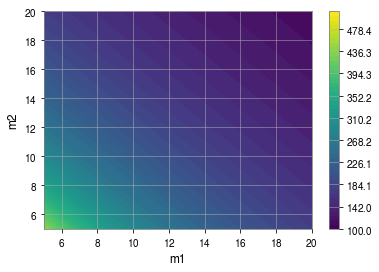

In [48]:
# as total mass increases lso_f decreases
mass_1 = np.linspace(5.0, 20.0, 100)
mass_2 = np.linspace(5.0, 20.0, 100)
X, Y = np.meshgrid(mass_1, mass_2)
Z = (C**3)/( G*(X+Y)*Mo*np.pi*6**(3/2) )
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, levels=np.linspace(100, 512, 50))
fig.colorbar(cp)
ax.set_xlabel('m1')
ax.set_ylabel('m2')

In [44]:
print(Z.max(),Z.min(), (Z.max()+Z.min())/2)

439.60150369389993 109.90037592347498 274.75093980868746


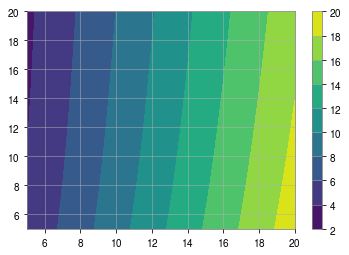

In [35]:
# as total mass increases lso_f decreases
mass_1 = np.linspace(5.0, 20.0, 100)
mass_2 = np.linspace(5.0, 20.0, 100)
X, Y = np.meshgrid(mass_1, mass_2)
Z = ( (mass_1*mass_2)**(3/5) )/( (X+Y)**(1/5) )
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)

In [38]:
print(Z.max(),Z.min())

19.127049995800736 3.623898318388477


In [36]:
from numpy import unravel_index
unravel_index(Z.argmax(), Z.shape)

(0, 99)

In [37]:
print(X[0,99],Y[0,99])

20.0 5.0


Text(0, 0.5, 'mass_ratio')

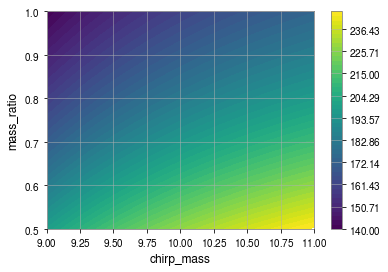

In [63]:
#studing the dependence of chirp_mass and mass ratio on lso_f
chirp_mass = np.linspace(9.0, 11.0, 50)
mass_ratio = np.linspace(0.5, 1.0, 50)
X, Y = np.meshgrid(chirp_mass, mass_ratio)
tot = X*(1+Y)**(6/5)/mass_ratio**(3/5)
Z = (C**3)/( G*(tot)*Mo*np.pi*6**(3/2) )
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, levels=np.linspace(140, 245, 50))
fig.colorbar(cp)
ax.set_xlabel('chirp_mass')
ax.set_ylabel('mass_ratio')

In [64]:
print(Z.max(),Z.min(), (Z.max()+Z.min())/2)

245.67274209418736 140.26931226316833 192.97102717867784


### As seen above lso_f varies a lot if the mass range prior is large. We will only use short range prior constructed from the previous analysis. For my calculation I will consider lso_f for the maximum chirp mass, as this chirp mass doesn't vary a lot from the real value; less information is lost. 

In [12]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, initial_eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, **kwargs):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    #last stable orbit
    lso_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    mass_diff = (mass_1-mass_2)*Mo
    f_min = 10.
    #f_max is set according to the priors we choose for chirp_mass and mass_ratio; depends on max possible lso_f. 
    f_max = 175.
    #time of coalescence is taken to be 0 for convenience
    tc = 0.
    
    foo = np.array(frequency_array_, dtype='float')

    h_plus,h_cross = hphc.htilde(foo, total_mass, symmetric_mass_ratio, mass_diff, initial_eccentricity, luminosity_distance, theta_jn, psi, phase, tc, f_min, lso_f, f_max)

    return {'plus': h_plus, 'cross': h_cross}

In [13]:
eccentric_waveform([105.],10.62,0.67,0.09,100.0,0.4,0.1,1.2,1249852157.0,45,5.73)

{'plus': array([1.14795973e-24+2.25589016e-23j]),
 'cross': array([-2.24828492e-23+1.14410811e-24j])}

In [7]:
# f_max calculation
# let prior in mass range from 5 to 20
eccentric_waveform([105.],10.62,0.67,0.09,100.0,0.4,0.1,1.2,1249852157.0,45,5.73)

{'plus': array([1.14795973e-24+2.25589016e-23j]),
 'cross': array([-2.24828492e-23+1.14410811e-24j])}

In [2]:
#test for eccn package
from eccn.functions import eccentric_waveform

In [3]:
sampling_frequency = 1024.0
duration = 4.0

injection_parameters = dict(chirp_mass=10.62, mass_ratio=0.67, initial_eccentricity=0.1, luminosity_distance=200.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1249852157.0, ra=45.0, dec=5.73)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

16:44 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: eccn.functions.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
minimum_frequency = 20.0+3.0
maximum_frequency = 175.0-3.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3.9)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
16:45 bilby INFO    : Injected signal in H1:
16:45 bilby INFO    :   optimal SNR = 49.42
16:45 bilby INFO    :   matched filter SNR = 49.03+1.25j
16:45 bilby INFO    :   chirp_mass = 10.62
16:45 bilby INFO    :   mass_ratio = 0.67
16:45 bilby INFO    :   initial_eccentricity = 0.09
16:45 bilby INFO    :   luminosity_distance = 200.0
16:45 bilby INFO    :   theta_jn = 0.4
16:45 bilby INFO    :   psi = 0.1
16:45 bilby INFO    :   phase = 1.2
16:45 bilby INFO    :   geocent_time = 1249852157.0
16:45 bilby INFO    :   ra = 45.0
16:45 bilby INFO    :   dec = 5.73
16:45 bilby INFO    : Injected signal in L1:
16:45 bilby INFO    :   optimal SNR = 66.67
16:45 bilby INFO    :   matched filter SNR = 67.78-1.91j
16:45 bilby INFO   

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

16:45 bilby INFO    : Injected signal in H1:
16:45 bilby INFO    :   optimal SNR = 49.42
16:45 bilby INFO    :   matched filter SNR = 98.44+1.25j
16:45 bilby INFO    :   chirp_mass = 10.62
16:45 bilby INFO    :   mass_ratio = 0.67
16:45 bilby INFO    :   initial_eccentricity = 0.09
16:45 bilby INFO    :   luminosity_distance = 200.0
16:45 bilby INFO    :   theta_jn = 0.4
16:45 bilby INFO    :   psi = 0.1
16:45 bilby INFO    :   phase = 1.2
16:45 bilby INFO    :   geocent_time = 1249852157.0
16:45 bilby INFO    :   ra = 45.0
16:45 bilby INFO    :   dec = 5.73
16:45 bilby INFO    : Injected signal in L1:
16:45 bilby INFO    :   optimal SNR = 66.67
16:45 bilby INFO    :   matched filter SNR = 134.45-1.91j
16:45 bilby INFO    :   chirp_mass = 10.62
16:45 bilby INFO    :   mass_ratio = 0.67
16:45 bilby INFO    :   initial_eccentricity = 0.09
16:45 bilby INFO    :   luminosity_distance = 200.0
16:45 bilby INFO    :   theta_jn = 0.4
16:45 bilby INFO    :   psi = 0.1
16:45 bilby INFO    :   ph

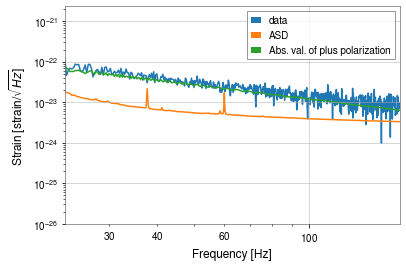

In [5]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [6]:
#SNR
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

82.98636593074045

In [19]:
ifos.start_time-1249852157.0

-3.9000000953674316